In [114]:
import sys
# Import NDVM modules to load pickled data
sys.path.append('/home/dosoukup/Dataset/NDVM/ndvm/modules')
sys.path.append('/home/dosoukup/Dataset/NDVM/ndvm/')
import os
import pickle
import metric1, metric2, metric3
import json
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [112]:
REPORT_NAME = "quic/report-dataset-1743377255"

# General Report 

In [66]:
with open(REPORT_NAME+'.csv', 'r') as file:
#with open('/home/dosoukup/Dataset/drift-katoda-v2/metrics/report-dataset-1742681397.csv', 'r') as file:
    basic = json.load(file)
pprint(basic)

{'Analyzed Samples': {'Benign': 44629, 'Malicious': 4462},
 'Association': {'Association': 1.6644385139450648,
                 'Max Clf Score': 0.9555459556928867,
                 'P-value status': 'Bad',
                 'P-value table': '           10        1 \n'
                                  'RF   0.090909  0.090909\n'
                                  'DT   0.090909  0.272727\n'
                                  'XGB  0.090909  0.090909',
                 'Raw AUC': "[0.08016110522152205, 'XGB']",
                 'Raw Slope': "[0.9381910745186547, 'DT']"},
 'Classes': 2,
 'Date': '03/22/25',
 'Duplicated Feature Vectors': 33700,
 'Feature List': {'Label': '',
                  'f1': '',
                  'f10': '',
                  'f11': '',
                  'f12': '',
                  'f13': '',
                  'f14': '',
                  'f15': '',
                  'f16': '',
                  'f17': '',
                  'f18': '',
                  'f19': '',
  

# Metric 1

In [ ]:
with open(REPORT_NAME+"-metric1/metric1.obj", "rb") as f:
    metric1 = pickle.load(f)

In [90]:
metric1.ds_redundancy

0.5078125

In [91]:
data = metric1.redundancy_metadata

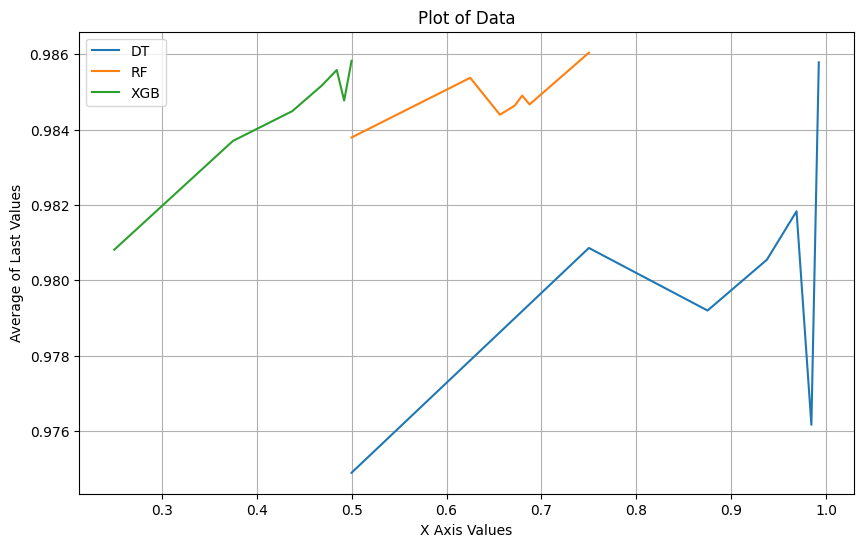

In [92]:
plt.figure(figsize=(10, 6))

for item in data:
    for name, values in item.items():
        x_values = sorted(values.keys())
        y_values = []
        for x in x_values:
            # Calculate the average of the last values (assuming each list has 5 values)
            avg_y = np.mean([v[0] for v in values[x]])
            y_values.append(avg_y)
        plt.plot(x_values, y_values, label=name)

plt.xlabel("X Axis Values")
plt.ylabel("Average of Last Values")
plt.title("Plot of Data")
plt.legend()
plt.grid(True)
plt.show()

# Metric 2

In [ ]:
with open(REPORT_NAME+"-metric2/metric2.obj", "rb") as f:
    metric2 = pickle.load(f)

In [31]:
metric2.raw_slope

[0.9381910745186547, 'DT']

In [32]:
metric2.print_results()

##### Results #####
P-value table
           10        1 
RF   0.090909  0.090909
DT   0.090909  0.272727
XGB  0.090909  0.090909
RF = 0.6564454240742001
DT = 0.9381910745186547
XGB = 0.6424857870218439
Max Slope
Slope: 0.9381910745186547 - DT
AUC: 0.08016110522152205 - XGB
Top AUC 0.08016110522152205 - Max F1: 0.9555459556928867 - Final Metric: 1.6644385139450648


In [35]:
# TODO Print and plot permutation results

In [59]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd
colors = cm.rainbow(np.linspace(0, 1, metric2.a[1]))

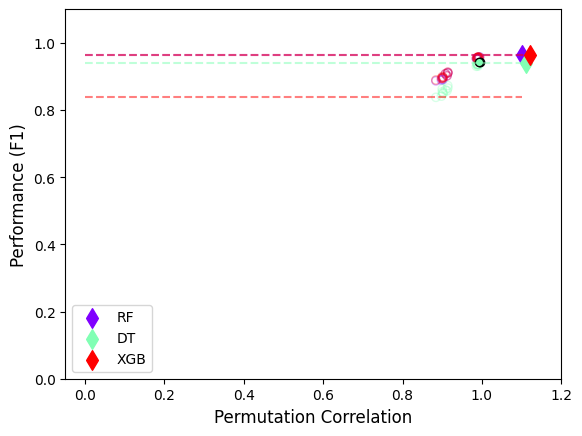

,10,1
RF,0.090909,0.090909
DT,0.090909,0.272727
XGB,0.090909,0.090909


In [60]:
pvalues = np.zeros((metric2.a[1],len(metric2.perc)))
colors = cm.rainbow(np.linspace(0, 1, metric2.a[1]))

# plot true values as diamonds
for i, c in zip(range(metric2.a[1]),colors):
    plt.scatter(1.1+i*0.01, metric2.ev.scores.mean(axis=2)[:, i, 0], s=100, color=c, marker='d')
    
plt.legend((metric2.clfs))

# plot lines for true values
for i, c in zip(range(metric2.a[1]),colors):
    plt.plot([0, 1.1+i*0.01], [metric2.ev.scores.mean(axis=2)[:, i, 0], metric2.ev.scores.mean(axis=2)[:, i, 0]], c=c, linestyle='dashed', alpha=0.5)

# plot permutations
colors = cm.rainbow(np.linspace(0, 1, metric2.a[1]))
for j in range(len(metric2.perc)):
    for i, c in zip(range(metric2.a[1]),colors):
        ind = np.where(metric2.perm[:,j,i]<metric2.ev.scores.mean(axis=2)[:, i, 0])
        plt.scatter((metric2.corr[ind,j]), metric2.perm[ind,j,i], color="none", edgecolor=c, alpha=0.3)
        
for j in range(len(metric2.perc)):
    for i, c in zip(range(metric2.a[1]),colors):
        ind = np.where(metric2.perm[:,j,i]>=metric2.ev.scores.mean(axis=2)[:, i, 0])
        plt.scatter((metric2.corr[ind,j]), metric2.perm[ind,j,i], color=c, edgecolor="black", alpha=1)
        pvalues[i,j] = ((len(ind[0])+1)*1.0)/(metric2.nperm+1);

plt.ylabel('Performance (F1)', size=12)
plt.xlabel('Permutation Correlation', size=12)       

plt.plot([0, 1.1], [metric2.perm.min(), metric2.perm.min()], color='red', linestyle='dashed', alpha=0.5)

plt.axis([-0.05, 1.2, 0, 1.1])

plt.show()

pv = pd.DataFrame(data=pvalues, index=metric2.clfs, columns=metric2.perc)

def significant(v):
    return "font-weight: bold; color: red" if v > 0.01 else None

pv.style.applymap(significant)

RF = 0.6564454240742001
DT = 0.9381910745186547
XGB = 0.6424857870218439
Slope: 0.9381910745186547 - DT
AUC: 0.08016110522152205 - XGB


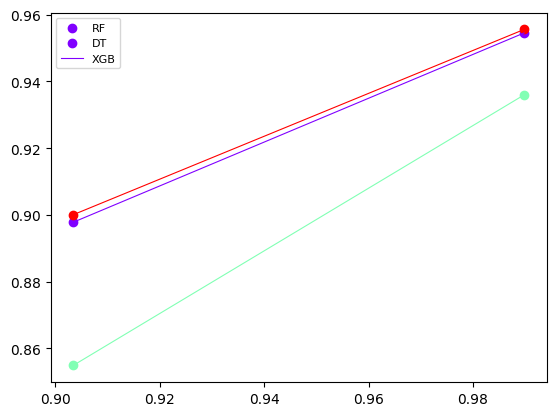

In [48]:
names = metric2.clfs
cor = []
per = []
slopes = []
auc_scores = []

for i, c in zip(range(metric2.a[1]),colors):
    for j in range(len(metric2.perc)):
        plt.scatter(np.mean(metric2.corr[:,j]), np.mean(metric2.perm[:,j,i]), color=c, alpha=1)
    
    cor = np.mean(metric2.corr[:,:], axis=0)
    per = np.mean(metric2.perm[:,:,i], axis=0)
    
    auc_score = auc(cor,per)
    slope, intercept = np.polyfit(cor, per, 1)
    plt.plot(cor, slope*cor + intercept, color=c, linewidth=0.8)
    print(names[i], '=', slope)
    slopes = np.append(slopes, slope)
    auc_scores = np.append(auc_scores, auc_score)

plt.legend(names, prop={'size': 8})

maxind = np.argmax(abs(slopes))
maxind_auc = np.argmax(abs(auc_scores))

print('Slope:', np.max(abs(slopes)), '-', names[maxind])
print('AUC:', np.max(abs(auc_scores)), '-', names[maxind_auc])

# Metric 3

In [ ]:
with open(REPORT_NAME+"-metric3/metric3.obj", "rb") as f:
    metric3 = pickle.load(f)

In [106]:
# The base key
next(iter(basic["Similarity"]["detail"]))

'Benign'

In [108]:
# All keys
basic["Similarity"]["detail"].keys()

dict_keys(['Benign', 'Malicious'])

In [109]:
# All metric 3 metadata
basic["Similarity"]["detail"]

{'Benign': {'l1_loss': 0.06639303267002106, 'relative_loss': 1.0},
 'Malicious': {'l1_loss': 0.036647047847509384,
  'relative_loss': 0.5519712893617661}}